# Example for first order ALE plot

In [1]:
import sys
project_path = "/".join(sys.path[0].split("/")[:-1])
sys.path.append(project_path)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from ale.ale.ale import ALE
from ale.utils.data_operations import get_mids


Before using the models download the boston housing data from: https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [2]:
data = pd.read_csv("../datasets/BostonHousing.csv")
X = data.loc[:, data.columns != "tax"]
y = data["tax"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3)

Text(0, 0.5, 'y_pred')

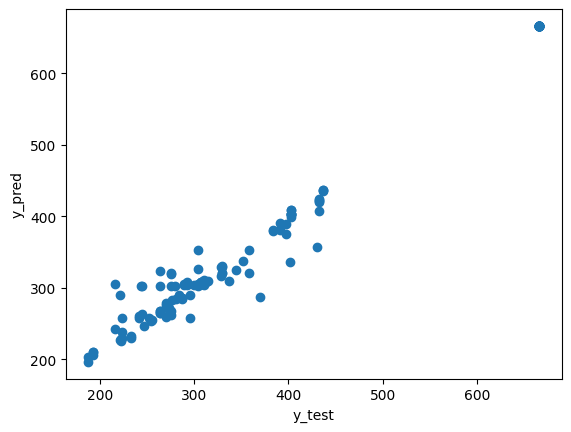

In [4]:
regressor=RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
ale_fig, ale_ax = plt.subplots()
ale_ax.scatter(y_test, y_pred)
ale_ax.set_xlabel("y_test")
ale_ax.set_ylabel("y_pred")

/tmp/ipykernel_3447/4083986333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-regressor.predict(X_train))


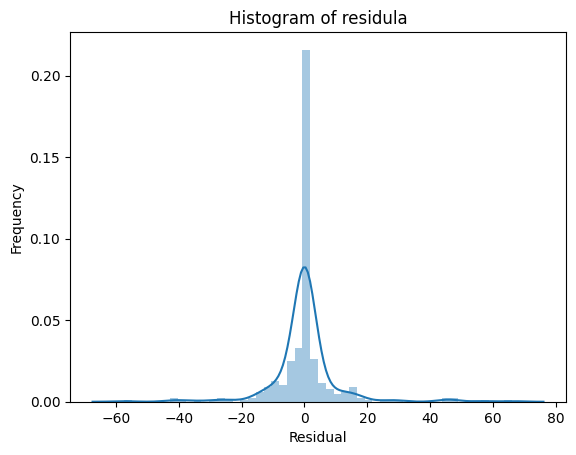

In [5]:
sns.distplot(y_train-regressor.predict(X_train))
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of residula")
plt.show()

1it [00:00, 12.53it/s]
1it [00:00, 11.14it/s]
1it [00:00,  5.89it/s]
1it [00:00, 33.40it/s]
1it [00:00, 55.53it/s]
/home/robin/projects/AccumulatedLocalEffectPlots/ale/ale/ale.py:226: RuntimeWarning: invalid value encountered in divide
  integral = np.trapz(scores, x=x, axis=1) / (x[-1] - x[0])
1it [00:00, 18.05it/s]
1it [00:00,  3.85it/s]
1it [00:00, 11.99it/s]
1it [00:00,  7.89it/s]
1it [00:00,  7.02it/s]
1it [00:00,  4.90it/s]
1it [00:00,  4.52it/s]


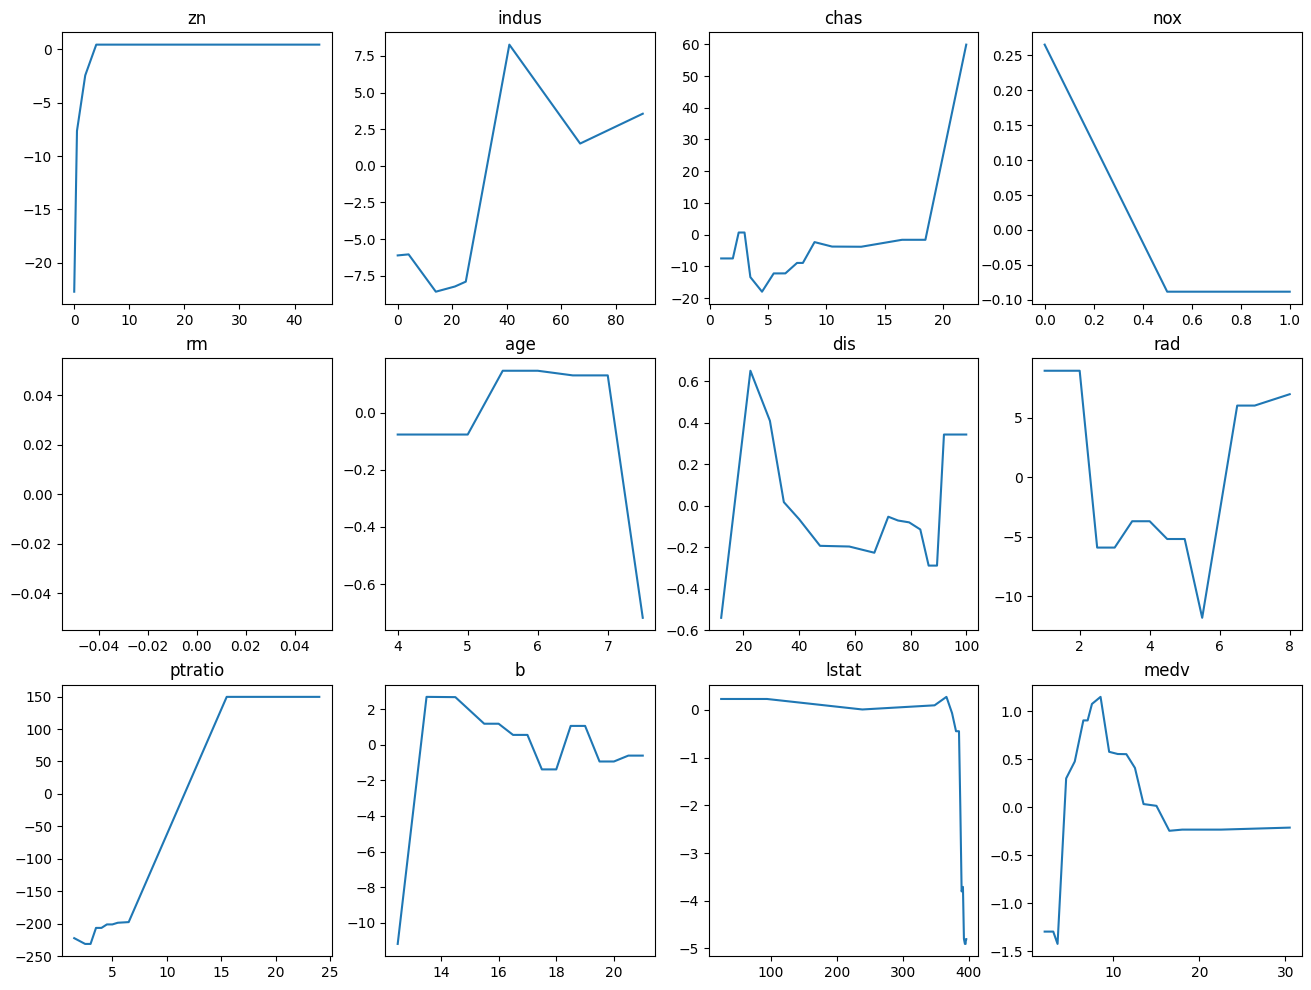

In [6]:
num_bins = 20

ale = ALE((regressor, ), num_bins, centered=True)

ale_fig, ale_axs = plt.subplots(3, 4, figsize=(16, 12))
for column_idx, (column_name, ale_ax) in enumerate(zip(X.columns[1:], ale_axs.flatten())):
    score, bins = ale(X_test, [column_idx])
    
    ale_ax.plot(get_mids(bins), score[0])
    ale_ax.set_title(column_name)

## ALE on a population of models

### Train a population of models

In [7]:
num_runs = 10
num_bins = 20

In [8]:
models = []
for run_idx in range(num_runs):
    regressor=RandomForestRegressor()

    regressor.fit(X_train, y_train)
    models.append(regressor)


### Plot

10it [00:00, 10.13it/s]
10it [00:01,  9.77it/s]
10it [00:01,  5.96it/s]
10it [00:00, 33.00it/s]
10it [00:00, 63.81it/s]
/home/robin/projects/AccumulatedLocalEffectPlots/ale/ale/ale.py:226: RuntimeWarning: divide by zero encountered in divide
  integral = np.trapz(scores, x=x, axis=1) / (x[-1] - x[0])
/home/robin/projects/AccumulatedLocalEffectPlots/ale/ale/ale.py:226: RuntimeWarning: invalid value encountered in divide
  integral = np.trapz(scores, x=x, axis=1) / (x[-1] - x[0])
10it [00:00, 17.78it/s]
10it [00:02,  3.89it/s]
10it [00:01, 10.00it/s]
10it [00:01,  8.56it/s]
10it [00:01,  7.29it/s]
10it [00:01,  5.12it/s]
10it [00:02,  3.97it/s]


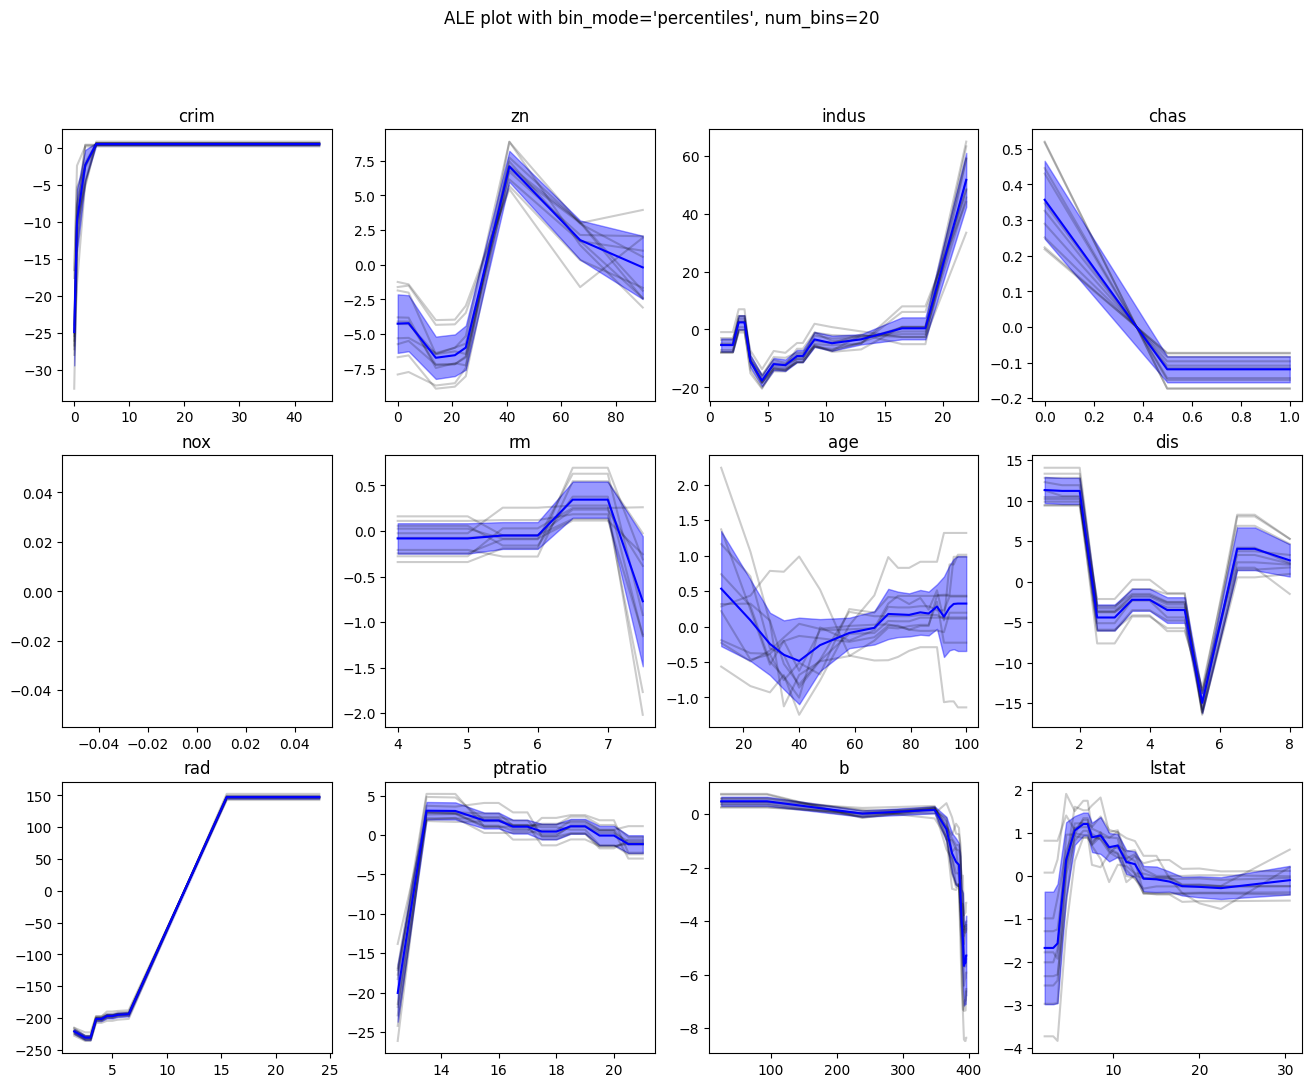

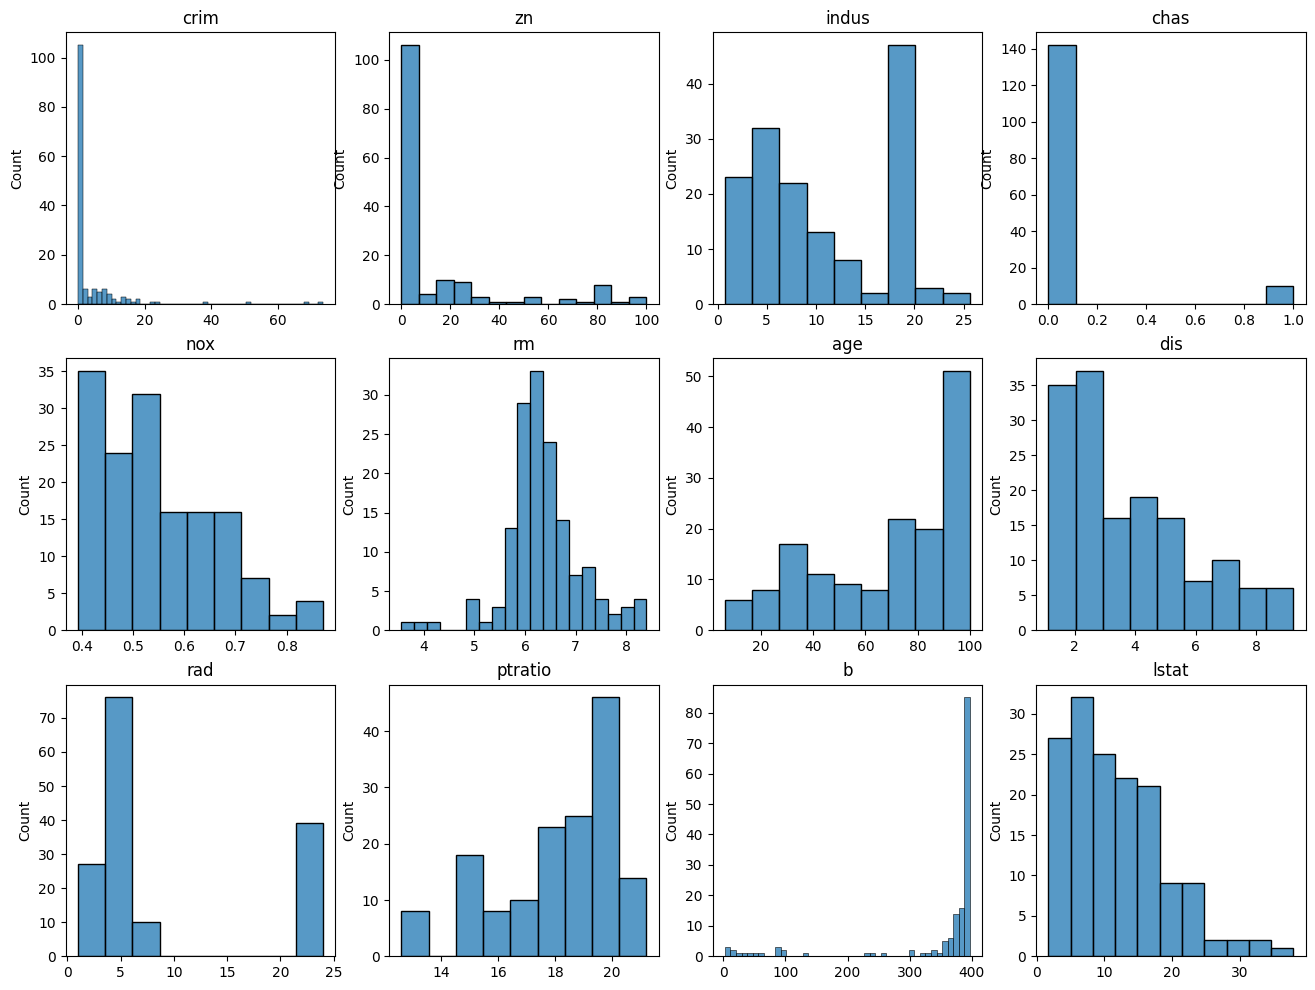

In [11]:
bin_mode = "percentiles"
ale = ALE(models, num_bins, centered=True, bin_mode=bin_mode)

ale_fig, ale_axs = plt.subplots(3, 4, figsize=(16, 12))
ale_fig.suptitle(f"ALE plot with {bin_mode=}, {num_bins=}")
hist_fig, hist_axs = plt.subplots(3, 4, figsize=(16, 12))
for column_idx, (column_name, ale_ax, hist_ax) in enumerate(zip(X.columns, ale_axs.flatten(), hist_axs.flatten())):
    scores, bins = ale(X_test, [column_idx])

    mids = get_mids(bins)
    ale_ax.plot(mids, scores.T, c="k", alpha=2/num_runs)
    
    # mean with error
    mean = scores.mean(axis=0)
    std = scores.std(axis=0)
    ale_ax.plot(mids, mean, color="b")
    ale_ax.fill_between(mids, mean - std, mean + std, color="b", alpha=4/num_runs)
    
    ale_ax.set_title(column_name)   

    # data distribution
    data = X_test[:, column_idx]
    # hist, bins = np.histogram(data, bins=bins)
    # hist_ax.bar(mids, hist)
    sns.histplot(data, ax=hist_ax)
    hist_ax.set_title(column_name)

